# Proyecto Ciencia de Datos equipa 32
#### MORTALIDAD MATERNA ASOCIADA AL ABORTO EN MEXICO ENTRE LOS AÑOS 2002-2022


####  1. Conección con el Google Drive

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 2. Importacion de bibliotecas

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#### 2. Carga del archivo csv

In [33]:
df= mortalidad_materna = pd.read_csv('/content/drive/MyDrive/proyecto ciencia de datos/mortalidad_materna_2002_2022.csv', encoding='latin-1')

#### 3. Exploracion de datos

In [34]:
df = pd.DataFrame(df)
df.head()

,Unnamed: 0,ANIO_NACIMIENTO,MES_NACIMIENTO,MES_NACIMIENTOD,DIA_NACIMIENTO,EDAD,ESTADO_CONYUGAL,ESTADO_CONYUGALD,ENTIDAD_RESIDENCIA,ENTIDAD_RESIDENCIAD,...,DIA_REGISTRO,ANIO_CERTIFICACION,MES_CERTIFICACION,MES_CERTIFICACIOND,DIA_CERTIFICACION,ANIO_BASE_DATOS,RAZON_MORTALIDAD_MATERNA,RAZON_MORTALIDAD_MATERNAD,EDAD_QUINQUENAL,EDAD_QUINQUENALD
0,NaN,0,0,NO ESPECIFICADO,0,22,1,SOLTERO,7,CHIAPAS,...,24,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
1,NaN,0,0,NO ESPECIFICADO,0,998,4,UNION LIBRE,21,PUEBLA,...,3,0,0,NO ESPECIFICADO,0,2002,0,MUERTES MATERNAS EXCLUIDAS PARA LA RAZÓN DE MO...,11,No especificado
2,NaN,0,0,NO ESPECIFICADO,0,23,5,CASADO,13,HIDALGO,...,29,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,3,20 a 24 años
3,NaN,0,0,NO ESPECIFICADO,0,998,1,SOLTERO,12,GUERRERO,...,16,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,11,No especificado
4,NaN,0,0,NO ESPECIFICADO,0,29,5,CASADO,33,ESTADOS UNIDOS DE NORTEAMÉRICA,...,9,0,0,NO ESPECIFICADO,0,2002,1,MUERTES MATERNAS PARA LA RAZÓN DE MORTALIDAD M...,4,25 a 29 años


In [35]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'ANIO_NACIMIENTO', 'MES_NACIMIENTO', 'MES_NACIMIENTOD',
       'DIA_NACIMIENTO', 'EDAD', 'ESTADO_CONYUGAL', 'ESTADO_CONYUGALD',
       'ENTIDAD_RESIDENCIA', 'ENTIDAD_RESIDENCIAD', 'MUNICIPIO_RESIDENCIA',
       'MUNICIPIO_RESIDENCIAD', 'LOCALIDAD_RESIDENCIA',
       'LOCALIDAD_RESIDENCIAD', 'TAMANIO_LOCALIDAD', 'TAMANIO_LOCALIDADD',
       'OCUPACION_HABITUAL', 'OCUPACION_HABITUALD', 'ESCOLARIDAD',
       'ESCOLARIDADD', 'DERECHOHABIENCIA', 'DERECHOHABIENCIAD',
       'ENTIDAD_OCURRENCIA', 'ENTIDAD_OCURRENCIAD', 'MUNICIPIO_OCURRENCIA',
       'MUNICIPIO_OCURRENCIAD', 'LOCALIDAD_OCURRENCIA',
       'LOCALIDAD_OCURRENCIAD', 'SITIO_DEFUNCION', 'SITIO_DEFUNCIOND',
       'ANIO_DEFUNCION', 'MES_DEFUNCION', 'MES_DEFUNCIOND', 'DIA_DEFUNCION',
       'HORA_DEFUNCION', 'MINUTOS_DEFUNCION', 'ASISTENCIA_MEDICA',
       'ASISTENCIA_MEDICAD', 'CAUSA_CIE_4', 'CAUSA_CIE_4D', 'CERTIFICO',
       'CERTIFICOD', 'ENTIDAD_REGISTRO', 'ENTIDAD_REGISTROD',
       'MUNICIPIO_REGISTRO', 'M

In [36]:
df.shape

(23278, 59)

#### 3. Limpieza de datos

In [37]:
def find_nans(df, columns):
   nans = df[df[column].isna()]
   return nans[['Unnamed', column]]

#### 4. Procesamiento de datos
#### Elección de las columnas con las que se trabajaran

In [38]:
columnas_bd = ['ENTIDAD_RESIDENCIAD', 'EDAD_QUINQUENALD', 'CAUSA_CIE_4D', 'DERECHOHABIENCIAD', 'ANIO_DEFUNCION']

In [39]:
mortalidad = mortalidad_materna[columnas_bd]


#### Filtrado de muertes por aborto

In [40]:
mortalidad_filtrada = mortalidad[mortalidad['CAUSA_CIE_4D'].str.contains('aborto', case=False, na=False)]

#### Agrupación de muertes por aborto por estado y año de defuncion

In [41]:
agrupacion_anual = mortalidad_filtrada.groupby(['ANIO_DEFUNCION', 'CAUSA_CIE_4D']).agg({
    'ENTIDAD_RESIDENCIAD': 'count',
}).rename(columns={'ENTIDAD_RESIDENCIAD': 'CONTEO_POR_ESTADO'})


In [42]:
agrupacion_anual = agrupacion_anual.sort_values(by=('CONTEO_POR_ESTADO'), ascending=False).reset_index()

In [43]:
df_resultado = pd.merge(mortalidad_filtrada, agrupacion_anual, on=['ANIO_DEFUNCION', 'CAUSA_CIE_4D'], how='left')

In [44]:
print(df_resultado)

                 ENTIDAD_RESIDENCIAD EDAD_QUINQUENALD  \
0                             MÉXICO     25 a 29 años   
1                            MORELOS     35 a 39 años   
2                             OAXACA     15 a 19 años   
3    VERACRUZ DE IGNACIO DE LA LLAVE     35 a 39 años   
4                            SINALOA     25 a 29 años   
..                               ...              ...   
815                           MÉXICO     10 a 14 años   
816                           MÉXICO     15 a 19 años   
817                          NAYARIT     15 a 19 años   
818                        CHIHUAHUA     10 a 14 años   
819              MICHOACÁN DE OCAMPO     15 a 19 años   

                                          CAUSA_CIE_4D  \
0    O031  ABORTO ESPONTÁNEO INCOMPLETO, COMPLICADO...   
1    O051  OTRO ABORTO INCOMPLETO, COMPLICADO POR H...   
2    O065  ABORTO NO ESPECIFICADO COMPLETO O NO ESP...   
3    O064  ABORTO NO ESPECIFICADO INCOMPLETO, SIN C...   
4    O069  ABORTO NO ESPE

In [45]:
conteo_por_año = df_resultado.groupby('ANIO_DEFUNCION').size()

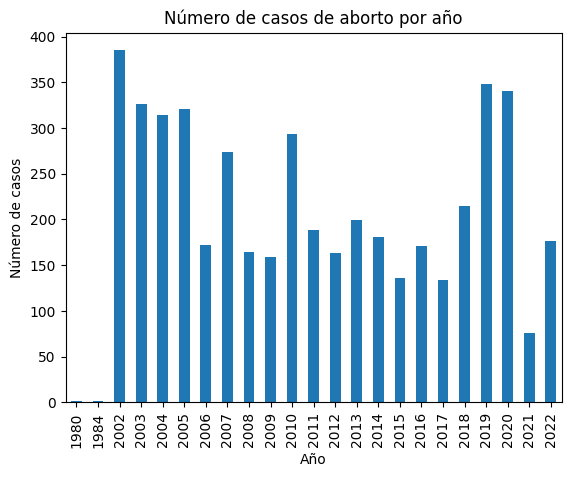

In [46]:
df_resultado.groupby('ANIO_DEFUNCION')['CONTEO_POR_ESTADO'].sum().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.title('Número de casos de aborto por año')
plt.show()


In [47]:
conteo_por_estado = df_resultado.groupby('ENTIDAD_RESIDENCIAD').size()

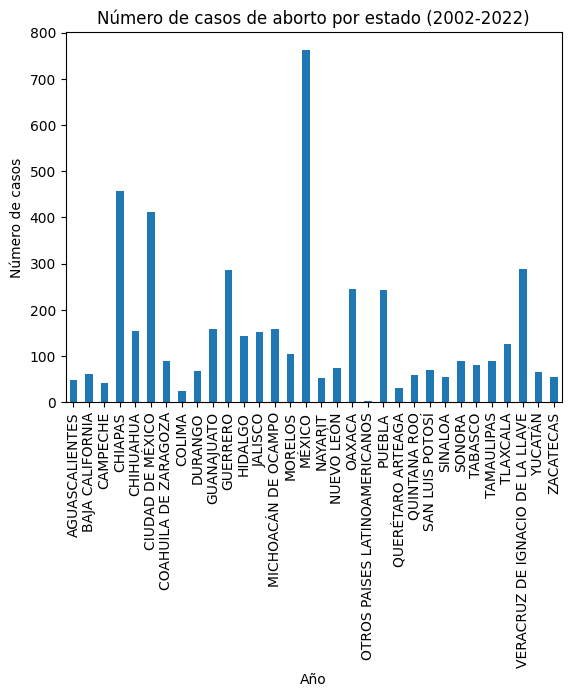

In [48]:
df_resultado.groupby('ENTIDAD_RESIDENCIAD')['CONTEO_POR_ESTADO'].sum().plot(kind='bar')
plt.xlabel('Año')
plt.ylabel('Número de casos')
plt.title('Número de casos de aborto por estado (2002-2022)')
plt.show()
